# An Social Media Analysis Program

Input: 
- The trend news they want to see

Outputs: 
- The relevant trend within a certain timeline and put them in order

High-Level Algorithm (step by step, plain English no Python!)
```
Import module we will use for the program
Define the function by using the trend function from tweepy and get the trend news
Define the geographical position of trends and get the location
By using the panda function to put the trend in a data frame and get a chart
User need to enter the index number from the chart that we previously show and pick the one they like
Extract the key information from that trend and put it in the timeline function
We can get topics that is relevant with the trend
By comparing the comment and like number under each topic, we will filter the hottest top 20 topics
Put these hottest tweets to the panda and form another chart
User can pick the tweet they like and view more detail information.
By using the folium function, putting tweets from different locations into the map
Use the choropleth function, add data and color to tell which state is happening big things
```


In [96]:
%matplotlib inline 

import import_ipynb
import Twitter
import json 
import pandas as pd
from IPython.display import display
import IPython.html
import requests

import matplotlib
import numpy as np

import matplotlib.pyplot as plt
trend = Twitter.trend()


Enter a place to see twitter trend --> New York
here is the top 10 trending on twitter in New York, sorted by tweet_volume


,name,tweet_volume
0,Greta,642302.0
32,#GE2019,487588.0
7,Corbyn,440445.0
8,Brexit,397408.0
2,#impeachmentDebate,242488.0
23,Mata,160201.0
30,#UKElection,149032.0
1,#BeBest,123366.0
31,#exitpoll,66844.0
20,Chao,63483.0


Choose a trend topic you would like to dig in --> Greta


,tweet,time,location,retweet_count
31,RT @TIME: .@GretaThunberg is TIME's 2019 Perso...,2019-12-12 22:30:04,"Albany, New York",92163
4,RT @TIME: .@GretaThunberg is TIME's 2019 Perso...,2019-12-12 22:30:07,"Florida, USA",92163
70,"RT @GretaThunberg: Wow, this is unbelievable! ...",2019-12-12 22:30:00,"Ithaca, NY",40664
62,RT @realDonaldTrump: So ridiculous. Greta must...,2019-12-12 22:30:01,"Johnstown, NY",37325
52,RT @realDonaldTrump: So ridiculous. Greta must...,2019-12-12 22:30:02,Zone Bleue,37323
...,...,...,...,...
67,"Estúpida, histérica, niñata, patética... A los...",2019-12-12 22:30:00,Madrid,0
71,Frustrated #youthactivists have once again cal...,2019-12-12 22:30:00,"Washington, DC",0
72,"#ElExtranjero El presidente de #EstadosUnidos,...",2019-12-12 22:30:00,,0
74,Greta Thunberg: 'People are dying from the cli...,2019-12-12 22:30:00,London,0


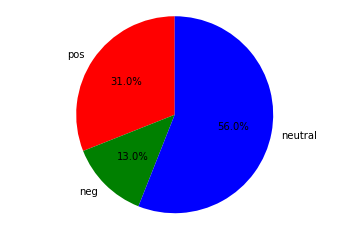

None

end of the program


In [135]:
def find_availiable_trend(usrPlace):
    for i in trend:
        if i['name'] == usrPlace:
            return i['woeid']
        else:
            continue
            
    return f'{usrPlace} is not available'

def get_trendlist(trendid):
    trendlist = Twitter.trend_place(trendid)
    trend_df = pd.DataFrame(data = trendlist[0]['trends'])
    trend_df = trend_df.sort_values(by = 'tweet_volume',ascending=False)
    trend_df = trend_df.filter(items = ['name','tweet_volume'])
    return trend_df.head(10)

def tweet2df(tweets):
    result_df = pd.DataFrame()
    result_df['tweet'] = [tweet.text for tweet in tweets]
    result_df['time'] = [tweet.created_at for tweet in tweets]
    result_df['location'] = [tweet.user.location for tweet in tweets]
    result_df['retweet_count'] = [tweet.retweet_count for tweet in tweets]
    result_df = result_df.sort_values(by = 'retweet_count',ascending=False)
    
    return result_df

def GetSentiment(text):
    # todo write code to return dict of sentiment for text
    url = 'http://text-processing.com/api/sentiment/'
    options = { 'text' : text }
    response = requests.post(url, data = options)
    sentiment = response.json()
    return sentiment

def pie_graph():
    labels = 'pos', 'neg', 'neutral'
    colors = ['r', 'g','b']
    plt.pie(sentiment, labels=labels, colors=colors,startangle=90, autopct='%.1f%%')
    plt.axis('equal')
    return plt.show()

pos=0
neg=0
neutral=0
usrPlace = input(f"Enter a place to see twitter trend --> ")    
trendid = find_availiable_trend(usrPlace)
try:
    trend_df = get_trendlist(trendid)
    print(f'here is the top 10 trending on twitter in {usrPlace}, sorted by tweet_volume')
    display(trend_df)
except:
    print(trendid)

usrTrend = input(f'Choose a trend topic you would like to dig in --> ')
result = Twitter.search(usrTrend)
result_df = tweet2df(result)

display(result_df)


for tweet in result:
    if GetSentiment([tweet.text])['label']=='pos':
        pos+=1
    elif GetSentiment([tweet.text])['label']=='neg':
        neg+=1
    else:
        neutral+=1

sentiment=[pos,neg,neutral]

display(pie_graph())

print('end of the program')
#trend.get(usrPlace, f'the {usrPlace} does not exist')

In [123]:
pos=0
neg=0
neutral=0
for tweet in result:
    if GetSentiment([tweet.text])['label']=='pos':
        pos+=1
    elif GetSentiment([tweet.text])['label']=='neg':
        neg+=1
    else:
        neutral+=1
sentiment=[pos,neg,neutral]



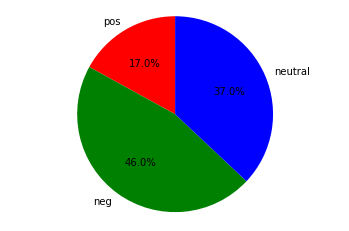

In [129]:
pie_graph()

In [125]:
def pie_graph():
    labels = 'pos', 'neg', 'neutral'
    colors = ['r', 'g','b']
    plt.pie(sentiment, labels=labels, colors=colors,startangle=90, autopct='%.1f%%')
    plt.axis('equal')
    return plt.show()

In [10]:
trend_df

,name,tweet_volume
1,Labour,1334120.0
2,Tory,506260.0
0,#GeneralElection2019,313867.0
3,#YouthQuake,129232.0
13,Vitoria,51858.0
5,#UxbridgeAndSouthRuislip,33243.0
7,Saka,32220.0
6,#KickBorisOut,14900.0
9,Ricky Tomlinson,13886.0
41,#GretaThunbergOutdidTrump,10388.0


In [11]:
help(trend_df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged :: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order
 |         Python 3.6 and later.
 |  
 |  index : Index or array-like
 |      Index

In [12]:
trend_df = trend_df.sort_values(by = 'tweet_volume',ascending=False)
trend_df = trend_df.filter(items = ['name','tweet_volume'])
trend_df.head(10)

,name,tweet_volume
1,Labour,1334120.0
2,Tory,506260.0
0,#GeneralElection2019,313867.0
3,#YouthQuake,129232.0
13,Vitoria,51858.0
5,#UxbridgeAndSouthRuislip,33243.0
7,Saka,32220.0
6,#KickBorisOut,14900.0
9,Ricky Tomlinson,13886.0
41,#GretaThunbergOutdidTrump,10388.0


In [13]:
result = Twitter.search('#GeneralElection2019')
result_pd = pd.DataFrame(data = result)
result_pd

,0
0,Status(_api=<tweepy.api.API object at 0x7fb2dd...
1,Status(_api=<tweepy.api.API object at 0x7fb2dd...
2,Status(_api=<tweepy.api.API object at 0x7fb2dd...
3,Status(_api=<tweepy.api.API object at 0x7fb2dd...
4,Status(_api=<tweepy.api.API object at 0x7fb2dd...
...,...
95,Status(_api=<tweepy.api.API object at 0x7fb2dd...
96,Status(_api=<tweepy.api.API object at 0x7fb2dd...
97,Status(_api=<tweepy.api.API object at 0x7fb2dd...
98,Status(_api=<tweepy.api.API object at 0x7fb2dd...


In [103]:
result

[Status(_api=<tweepy.api.API object at 0x7fb2ddbe8d30>, _json={'created_at': 'Thu Dec 12 20:54:02 +0000 2019', 'id': 1205229345654091777, 'id_str': '1205229345654091777', 'text': "@LongsightedOwl I'm normally a lib dem voter, but I voted tactically for Labour....  for the first time ever. If that helps", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'LongsightedOwl', 'name': 'Tony 🌹', 'id': 1197140485854380034, 'id_str': '1197140485854380034', 'indices': [0, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1205195196302086150, 'in_reply_to_status_id_str': '1205195196302086150', 'in_reply_to_user_id': 1197140485854380034, 'in_reply_to_user_id_str': '1197140485854380034', 'in_reply_to_screen_name': 'LongsightedOwl', 'user': {'id': 83889685, 'id_str': '83889685', 'name': 'Keri', '

In [112]:
def tweet2df(tweets):
    result_df = pd.DataFrame()
    result_df['tweet'] = [tweet.text for tweet in tweets]
    result_df['time'] = [tweet.created_at for tweet in tweets]
    result_df['location'] = [tweet.user.location for tweet in tweets]
    result_df['retweet_count'] = [tweet.retweet_count for tweet in tweets]
    result_df = result_df.sort_values(by = 'retweet_count',ascending=False)
    result_df['sense'] = GetSentiment([tweet.text for tweet in tweets])['label']

    return result_df


In [114]:
result_df = tweet2df(result)

In [115]:
result_df

,tweet,time,location,retweet_count,sense
72,RT @yamitsi: Don’t forget to vote Labour today...,2019-12-12 22:05:18,"Islington, England",5076,pos
41,RT @yamitsi: Don’t forget to vote Labour today...,2019-12-12 22:05:19,Ashill,5076,pos
35,RT @yamitsi: Don’t forget to vote Labour today...,2019-12-12 22:05:19,,5076,pos
53,RT @ellenporter__: Don’t vote labour if you th...,2019-12-12 22:05:19,"Hereford, England",2776,pos
29,RT @ellenporter__: Don’t vote labour if you th...,2019-12-12 22:05:19,,2776,pos
...,...,...,...,...,...
68,uk? y'all alright? imagine not voting labour h...,2019-12-12 22:05:18,"Gothenburg, Sweden",0,pos
69,Predictions\nVery low turnout\nLab-leave go To...,2019-12-12 22:05:18,European Union 🇪🇺,0,pos
23,Exit poll predicts huge majority for Conservat...,2019-12-12 22:05:20,"Littlehampton, England",0,pos
71,i knew this would happen. labour supporters ar...,2019-12-12 22:05:18,"South West, England",0,pos


In [18]:
result[0]

Status(_api=<tweepy.api.API object at 0x7fb2ddbe8d30>, _json={'created_at': 'Thu Dec 12 20:49:29 +0000 2019', 'id': 1205228198717468674, 'id_str': '1205228198717468674', 'text': 'RT @nicolacoughlan: Did it, saw loads of young lads there voting, and old ladies, and a dog and it was emotional and I have hope\n#IVotedLab…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nicolacoughlan', 'name': '🌹Nicola Coughlan🌹', 'id': 32184345, 'id_str': '32184345', 'indices': [3, 18]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1488803148, 'id_str': '1488803148', 'name': 'Saffioyah', 'screen_name': 'marawipyramids', 'location': '', 'description': '🌍', 'url':